In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings("ignore")


data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

features = data[["toothed","hair","breathes","legs"]]
target = data["species"]

data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


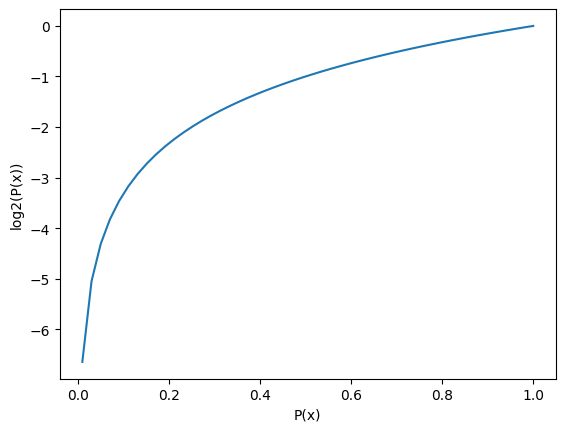

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log2(P(x))")
plt.show()

In [22]:
data.species.unique()
data['Species']=data.species.map({'Mammal':0,'Reptile':1})


In [23]:
def entropy(x):
    
    try:
        
        counts=np.bincount(x)
        p=counts/len(x)
        entropy=-np.sum(np.multiply(p,np.log2(p)))
        return entropy 
    except:
        counts=x.value_counts()
        n=counts.sum()

        entropy=-sum([(counts[key]/n)*np.log2(counts[key]/n) for key in counts.keys()])
        return entropy

In [24]:
entropy(data.Species)

0.9709505944546686

In [38]:


def compute_impurity(feature,impurity_criterion):
    probs=feature.value_counts(normalize=True)
    if impurity_criterion=='entropy':
        impurity=-1*np.sum(np.log2(probs)*probs)
    elif impurity_criterion=='gini':
        impurity=1-np.sum(np.square(probs))   
    else:
        raise ValueError('Unknown impurity criterion')    
    return (round(impurity,3))
        
       
    

In [59]:


import pandas as pd
import io
import requests

url_name = 'https://raw.githubusercontent.com/akmand/datasets/master/FMLPDA_Table4_3.csv'
url_content = requests.get(url_name, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df



,stream,slope,elevation,vegetation
0,False,steep,high,chapparal
1,True,moderate,low,riparian
2,True,steep,medium,riparian
3,False,steep,medium,chapparal
4,False,flat,high,conifer
5,True,steep,highest,conifer
6,True,steep,high,chapparal


In [60]:
df.elevation.value_counts()

high       3
medium     2
low        1
highest    1
Name: elevation, dtype: int64

In [61]:
def information_gain(starting_labels,split_labels):
    info_gain=entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain-=len(branched_subset)*entropy(branched_subset)/len(starting_labels)
    return info_gain    

In [62]:
def split(dataset,column):
    split_data=[]
    col_vals=data[column].unique()
    for col_val in col_vals:
        split_data.append(dataset[dataset[column]==col_val])
    return (split_data)    

In [63]:
def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_attribute_name]==vals[i]).dropna()
                                       [target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain